Problem 1

Part A)

Regardless of the assumptions made, the maximum probability class was always not selecting a new bank service. The probabilies were the same order of magnitude when LDA was used with equal class priors and equal costs of misclassifications, but not choosing a new service still had the maximum probability. This is likely because customers with similar characteristics to the one we are predicting behavior for typically do not choose a new bank service.  Because the prior is so influential in the outcome of the decision rule, when the prior was high for not selecting a new bank service that outcome always had a maximum probability one magnitude greater than choosing a new bank service. The added cost only made this difference greater.

In [17]:
# This is code for Quadratic Discriminant Analysis
# Written by William F Basener
# University of Virginia, School of Data Science
# For use in teaching Bayesian Machine Learning
#
# The code currently computes the maximum likelihood classification
# Student is to add method to compute posterior probabilities and maximum probability classification

import pandas as pd
import numpy as np


def multivariate_gaussian_pdf(X, MU, SIGMA):
    """Code from Data Blog https://xavierbourretsicotte.github.io/MLE_Multivariate_Gaussian.html
    Maximum Likelihood Estimator: Multivariate Gaussian Distribution
        by Xavier Bourret Sicotte, Fri 22 June 2018
    Returns the pdf of a multivariate Gaussian distribution
     - X, MU are p x 1 vectors
     - SIGMA is a p x p matrix"""
    # Initialize and reshape
    X = X.reshape(-1, 1)
    MU = MU.reshape(-1, 1)
    p, _ = SIGMA.shape

    # Compute values
    SIGMA_inv = np.linalg.inv(SIGMA)
    denominator = np.sqrt((2 * np.pi) ** p * np.linalg.det(SIGMA))
    exponent = -(1 / 2) * ((X - MU).T @ SIGMA_inv @ (X - MU))

    # Return result
    return float((1. / denominator) * np.exp(exponent))


class QDA:
    """Creates a class for Quadratic Discriminant Analysis
    Input:
        fname = file name for a csv file, must have one column labeled "class" and the rest numeric data
    Methods:
        compute_probabilities = given an input observation computes the likelihood for each class and the GML class
        compute_probabilities: given an input observation and prior probabilities,
            computes the posterior probabilities for each class and most probable class"""

    def __init__(self, fname):
        # reads the data and computes the statistics needed for classification

        # read the iris data as a Pandas data frame
        df = pd.read_csv(fname)

        # separate the class labels from the rest of the data
        # we are assuming the column name with class labels is 'Class'
        # and all other columns are numeric
        self.data_labels = df.loc[:]['y']
        self.data = np.asarray(df.loc[:,['age','balance','duration']])
        #self.data = np.asarray(df.drop('y', axis=1, inplace=False))

        # get information about the dimensions the data
        self.num_rows, self.num_cols = self.data.shape

        # get the class names as an array of strings
        self.class_names = np.unique(self.data_labels)

        # determine number of observations in each class
        self.num_obs = dict()
        for name in self.class_names:
            self.num_obs[name] = sum(self.data_labels == name)

        # compute the mean of each class
        self.means = dict()
        for name in self.class_names:
            self.means[name] = np.mean(self.data[self.data_labels == name, :], 0)

        # compute the covariance matrix of each class
        self.covs = dict()
        for name in self.class_names:
            self.covs[name] = np.cov(np.transpose(self.data[self.data_labels == name, :]))
        self.likelihoods = []

    def compute_likelihoods(self, x):
        # compute and output the likelihood of each class and the maximum likelihood class

        # check that the input data x has the correct number of rows
        if not (len(x) == self.num_cols):
            print('Data vector has wrong number of values.')
            return -1

        # reformat x as a numpy array, incase the user input a list
        x = np.asarray(x)

        # compute the likelihood of each class
        likelihoods = np.zeros(len(self.class_names))
        idx = 0
        for name in self.class_names:
            likelihoods[idx] = multivariate_gaussian_pdf(x, self.means[name], self.covs[name])
            idx = idx + 1
        # get the indices for sorting the likelihoods (in descending order)
        indices_sorted = np.argsort(likelihoods)[::-1]

        # print the predicted class and all class likelihoods
        print('QDA Predicted Class: ' + self.class_names[indices_sorted[0]])
        print('QDA Class Likelihoods:')
        for idx in range(len(indices_sorted)):
            print(self.class_names[indices_sorted[idx]] + ': ' + str(likelihoods[indices_sorted[idx]]))
        self.likelihoods = likelihoods
        # return the likelihoods
        return likelihoods

    def compute_probabilities(self, x, priors, costs):
        #need to complete this?
        # compute and output the probability of each class and the maximum probability class
        #given an input observation and prior probabilities, computes the posterior probabilities for each class and most probable class
        #print(self.likelihoods)
        if not (len(x) == self.num_cols):
            print('Data vector has wrong number of values.')
            return -1
        probabilities = []
        for i in range(len(self.likelihoods)):
            probabilities.append(self.likelihoods[i]*priors[i]*costs[i])
            print("Posterior probability for class "+self.class_names[i]+": "+str(probabilities[i]))
        indices_sorted = np.argsort(self.likelihoods)[::-1]
        print("Most probable class: "+self.class_names[indices_sorted[0]])
        


model_qda = QDA('bank-full.csv')

bank_observation = [58,261,261]
model_qda.compute_likelihoods(bank_observation)
costs = [1,1]
priors = [0.5,0.5]
print("Posterior Probabilities with equal priors and equal costs: ")
model_qda.compute_probabilities(bank_observation, priors,costs)

priors = [0.9,0.1]
print("Posterior Probabilities with unequal priors and equal costs: ")
model_qda.compute_probabilities(bank_observation, priors,costs)

costs = [15,1]
print("Posterior Probabilities with unequal priors and unequal costs: ")
model_qda.compute_probabilities(bank_observation,priors,costs)


QDA Predicted Class: no
QDA Class Likelihoods:
no: 2.1030206042712085e-09
yes: 1.0972531944110302e-09
Posterior Probabilities with equal priors and equal costs: 
Posterior probability for class no: 1.0515103021356043e-09
Posterior probability for class yes: 5.486265972055151e-10
Most probable class: no
Posterior Probabilities with unequal priors and equal costs: 
Posterior probability for class no: 1.8927185438440876e-09
Posterior probability for class yes: 1.0972531944110303e-10
Most probable class: no
Posterior Probabilities with unequal priors and unequal costs: 
Posterior probability for class no: 2.8390778157661314e-08
Posterior probability for class yes: 1.0972531944110303e-10
Most probable class: no


Part B)

In [19]:
def multivariate_gaussian_pdf(X, MU, SIGMA):
    """Code from Data Blog https://xavierbourretsicotte.github.io/MLE_Multivariate_Gaussian.html
    Maximum Likelihood Estimator: Multivariate Gaussian Distribution
        by Xavier Bourret Sicotte, Fri 22 June 2018
    Returns the pdf of a multivariate Gaussian distribution
     - X, MU are p x 1 vectors
     - SIGMA is a p x p matrix"""
    # Initialize and reshape
    X = X.reshape(-1, 1)
    MU = MU.reshape(-1, 1)
    p, _ = SIGMA.shape

    # Compute values
    SIGMA_inv = np.linalg.inv(SIGMA)
    denominator = np.sqrt((2 * np.pi) ** p * np.linalg.det(SIGMA))
    exponent = -(1 / 2) * ((X - MU).T @ SIGMA_inv @ (X - MU))

    # Return result
    return float((1. / denominator) * np.exp(exponent))

#for LDA the covariances have to be equal, this is not the case for quadratic
#compute a pool variance covariance matrix
class LDA:
    """Creates a class for Linear Discriminant Analysis
    Input:
        fname = file name for a csv file, must have one column labeled "class" and the rest numeric data
    Methods:
        compute_probabilities = given an input observation computes the likelihood for each class and the GML class
        compute_probabilities: given an input observation and prior probabilities,
            computes the posterior probabilities for each class and most probable class"""

    def __init__(self, fname):
        # reads the data and computes the statistics needed for classification

        # read the iris data as a Pandas data frame
        df = pd.read_csv(fname)

        # separate the class labels from the rest of the data
        # we are assuming the column name with class labels is 'Class'
        # and all other columns are numeric
        self.data_labels = df.loc[:]['y']
        self.data = np.asarray(df.loc[:,['age','balance','duration']])

        # get information about the dimensions the data
        self.num_rows, self.num_cols = self.data.shape

        # get the class names as an array of strings
        self.class_names = np.unique(self.data_labels)

        # determine number of observations in each class
        self.num_obs = dict()
        for name in self.class_names:
            self.num_obs[name] = sum(self.data_labels == name)

        # compute the mean of each class
        self.means = dict()
        for name in self.class_names:
            self.means[name] = np.mean(self.data[self.data_labels == name, :], 0)

        # compute the mean covariance matrix
        self.cov = np.zeros([self.num_cols, self.num_cols])
        for name in self.class_names:
            self.cov = self.cov + self.num_obs[name] * np.cov(np.transpose(self.data[self.data_labels == name, :]))
        self.cov = self.cov / self.num_rows
        self.likelihoods = []
    def compute_likelihoods(self, x):
        # compute and output the likelihood of each class and the maximum likelihood class

        # check that the input data x has the correct number of rows
        if not (len(x) == self.num_cols):
            print('Data vector has wrong number of values.')
            return -1

        # reformat x as a numpy array, incase the user input a list
        x = np.asarray(x)

        # compute the likelihood of each class
        likelihoods = np.zeros(len(self.class_names))
        idx = 0
        for name in self.class_names:
            likelihoods[idx] = multivariate_gaussian_pdf(x, self.means[name], self.cov)
            idx = idx + 1

        # get the indices for sorting the likelihoods (in descending order)
        indices_sorted = np.argsort(likelihoods)[::-1]

        # print the predicted class and all class likelihoods
        print('LDA Predicted Class: ' + self.class_names[indices_sorted[0]])
        print('LDA Class Likelihoods:')
        for idx in range(len(indices_sorted)):
            print(self.class_names[indices_sorted[idx]] + ': ' + str(likelihoods[indices_sorted[idx]]))
        self.likelihoods = likelihoods
        # return the likelihoods
        return likelihoods

    def compute_probabilities(self, x, priors, costs):
        # compute and output the probability of each class and the maximum probability class
        if not (len(x) == self.num_cols):
            print('Data vector has wrong number of values.')
            return -1
        probabilities = []
        for i in range(len(self.likelihoods)):
            probabilities.append(self.likelihoods[i]*priors[i]*costs[i])
            print("Posterior probability for class "+self.class_names[i]+": "+str(probabilities[i]))
        indices_sorted = np.argsort(self.likelihoods)[::-1]
        print("Most probable class: "+self.class_names[indices_sorted[0]])

model_lda = LDA('bank-full.csv')

bank_observation = [58,261,261]
model_lda.compute_likelihoods(bank_observation)
costs = [1,1]
priors = [0.5,0.5]
print("Posterior Probabilities with equal priors and equal costs: ")
model_lda.compute_probabilities(bank_observation, priors,costs)

priors = [0.9,0.1]
print("Posterior Probabilities with unequal priors and equal costs: ")
model_lda.compute_probabilities(bank_observation, priors,costs)

costs = [15,1]
print("Posterior Probabilities with unequal priors and unequal costs: ")
model_lda.compute_probabilities(bank_observation,priors,costs)

LDA Predicted Class: no
LDA Class Likelihoods:
no: 1.956466109661074e-09
yes: 1.0728059317829897e-09
Posterior Probabilities with equal priors and equal costs: 
Posterior probability for class no: 9.78233054830537e-10
Posterior probability for class yes: 5.364029658914948e-10
Most probable class: no
Posterior Probabilities with unequal priors and equal costs: 
Posterior probability for class no: 1.7608194986949668e-09
Posterior probability for class yes: 1.0728059317829898e-10
Most probable class: no
Posterior Probabilities with unequal priors and unequal costs: 
Posterior probability for class no: 2.6412292480424504e-08
Posterior probability for class yes: 1.0728059317829898e-10
Most probable class: no


Question 2

In [187]:
# Naive Bayes Classification
# Training 

# Priors
# Uninformed priors
# priors = np.array([1/3,1/3,1/3])
mushroom_names = pd.read_csv("MushroomVariables.txt")
shroom_data = pd.read_csv("MushroomData.csv", header=None)
shroom_data.columns=mushroom_names.columns

In [188]:
shroom_data.head()

,edible_class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [189]:
import sklearn
from sklearn.model_selection import train_test_split
train,test = sklearn.model_selection.train_test_split(shroom_data,test_size=0.33,random_state=42)
train_y = train['edible_class']
print(train.shape)
print(test.shape)

(5639, 23)
(2778, 23)


In [190]:
train_y.value_counts()

EDIBLE       2991
POISONOUS    2647
Name: edible_class, dtype: int64

In [191]:

# Informed priors
N_edible = np.array([2991,2647])
edible_labels = np.array(["EDIBLE","POISONOUS"])
TotalMushrooms = sum(N_edible)
priors = N_edible/TotalMushrooms 

Getting the dataframe into the correct form!!

In [192]:
train_sort = train.drop(['edible_class'],axis=1)

In [193]:
# Probability of Words given review type
#WordSums = train_x.sum(0) # number of words in each review category
def transform_data(train,train_sort):
    df = pd.DataFrame()
    for column in train_sort:
        new_train = train.groupby([column,'edible_class'])[column].count()
        new_train_df = pd.DataFrame(new_train)
        new_train_df.columns=['counts']
        new_train_df.reset_index(inplace=True)
        new_train_df = new_train_df.pivot(index='edible_class', columns=column,values='counts').fillna(0)
        new_train_df.columns.name=None
        new_train_df.rename_axis(None,inplace=True)
        new_train_df = new_train_df.add_suffix(str(column)).T
        df = pd.concat([df,new_train_df])
    return df

In [194]:
df = transform_data(train,train_sort)

In [201]:
df

,EDIBLE,POISONOUS
BELLcap-shape,275.0,33.0
CONICALcap-shape,0.0,3.0
CONVEXcap-shape,1350.0,1156.0
FLATcap-shape,1189.0,1039.0
KNOBBEDcap-shape,155.0,416.0
...,...,...
MEADOWShabitat,165.0,23.0
PATHShabitat,92.0,667.0
URBANhabitat,67.0,184.0
WASTEhabitat,115.0,0.0


Now we can calculate probabilities

In [195]:
# Probability of Words given review type

v = len(df.index)# number of distinct words in the data
α = 1.5 # smoothing parameter

Pword = np.zeros([len(df.index), len(df.columns)])
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        Pword[i,j] = (df.iloc[i,j] + α)/(N_edible[j] + v*α)

In [196]:
edible_class = test['edible_class']
test.drop('edible_class',inplace=True,axis=1)

In [202]:
test = test.astype(str).apply(lambda x : x+x.name)

In [230]:
# Naive Bayes Classification
# Classification of new review


#NewReview = ["we", "liked", "the", 'tasty', "calamari"]
edible_predicted = []
# Match words with the words in the corpus
for row in range(len(test.index)):
    FeaturesIndex = list()
    for i in range(len(test.iloc[row,:])):
        for j in range(len(df.index)):
            if test.iloc[row,:][i] == df.index[j].strip():
                FeaturesIndex.append(j)

    # Likelihoods

    likelihoods = np.ones(len(df.columns))
    for j in range(len(df.columns)):
        for i in FeaturesIndex:
            likelihoods[j] = likelihoods[j]*Pword[i,j]

    # Posterior Probabilities

    numerator = likelihoods * priors
    postprob = np.round(numerator/numerator.sum(), 4)
    postprob

    if postprob[0]>postprob[1]:
        edible_predicted.append("EDIBLE")
    else:
        edible_predicted.append("POISONOUS")

Predicted values for the test data:

In [231]:
edible_predicted = pd.DataFrame(edible_predicted,columns=["edible_class"])
edible_predicted.value_counts()

edible_class
EDIBLE          1614
POISONOUS       1164
dtype: int64

Real values for the test data:

In [226]:
edible_class.value_counts()

EDIBLE       1497
POISONOUS    1281
Name: edible_class, dtype: int64

In [233]:
sklearn.metrics.accuracy_score(edible_class,edible_predicted)

0.9456443484521239

Question 3

In [260]:
import numpy as np
import matplotlib.pyplot as plt

In [321]:
# true signal curve
def Bayes_least_squares(variance_eta, variance_theta,N):
    # Example 12.1 in Theodoridis
    # Written by D.E. Brown
    # Number and range of training samples
    N = N
    x_min = 0.01
    x_max = 2

    # sigma eta and sigma theta 

    #variance_input = [sig_eta, sig_theta]

    # Variance for the noise, eta
    variance_eta = float(variance_eta)
    variance_theta = float(variance_theta)
    #std_eta = np.sqrt(variance_eta)
    std_eta = np.sqrt(variance_eta)
    sigma_t = np.sqrt(variance_theta)
    
    # Set random or true theta parameters for the ground truth equation
    theta_true = np.array([-1.7,-0.1,3.2,0.7,-0.8])
    theta_distrbd = np.array([-0.004, -10.54, 0.465, 0.087, -0.093])
    l = len(theta_true)

    # Parameters for gaussian prior
    #variance_theta = variance_input[1]
    #sigma_theta = np.sqrt(variance_theta)
    mu_theta_prior = theta_true # or mu_theta_prior = theta_distrbd

    # Number of samples for prediction
    Np = 20

    # Generate training samples
    x = np.linspace(x_min, x_max, N, endpoint=False)

    # Generate random eta
    eta = np.random.normal(0, std_eta, N)

    # Measurement matrix
    phi = np.array([np.ones_like(x), x, np.sqrt(x), np.log(x), np.power(x,3)]).T

    # Generate observations with eta
    y = np.matmul(phi, theta_true) + eta

    # Covariance matrix of Gaussian posterior
    temp = np.power(variance_theta, -1) * np.eye(l) + np.matmul(phi.T, phi) * np.power(variance_eta, -1)
    sigma_theta_pos = np.linalg.inv(temp) 

    # Posterior mean
    mu_theta_pos =  mu_theta_prior + np.dot(np.power(variance_eta, -1) * (sigma_theta_pos), np.dot(phi.T, (y - np.dot(phi, mu_theta_prior))))

    # Generate sample for predictions
    x_pred = (x_max - x_min) * np.random.random(Np)

    # Prediction measurement matrix
    phi_pred = np.array([np.ones_like(x_pred), x_pred, np.sqrt(x_pred), np.log(x_pred), np.power(x_pred,3)]).T

    # Predicted mean
    mu_y_pred = np.dot(phi_pred, mu_theta_pos)

    # Predicted variance
    temp = np.power(variance_theta, -1) * np.eye(l) + np.matmul(phi_pred.T, phi_pred) * np.power(variance_eta, -1)
    sigma_theta_pos_pred = np.linalg.inv(temp)
    sigma_y_pred = variance_eta + np.dot(np.dot(phi_pred, sigma_theta_pos_pred), phi_pred.T)

    # Plot ground truth and results

    x_true = np.linspace(x_min, x_max, 5000, endpoint=False) 
    phi_true = np.array([np.ones_like(x_true), x_true, np.sqrt(x_true), np.log(x_true), np.power(x_true,3)]).T 
    y_true = np.dot(phi_true, theta_true)


    plt.figure(figsize=(10,7))
    plt.plot(x_true,y_true, 'blue')
    plt.scatter(x_pred, mu_y_pred, marker='*', c='blue')
    plt.errorbar(x_pred,mu_y_pred, yerr=np.diag(sigma_y_pred), linestyle='None', c='red', linewidth=1)
    plt.show()

Sigma eta = 1, Sigma theta=0.1, N=20

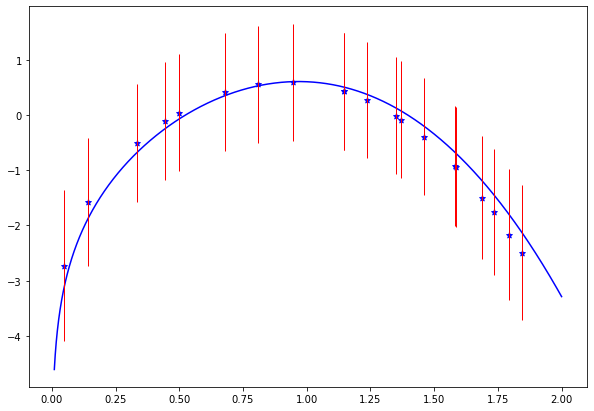

In [322]:
Bayes_least_squares(1,0.1,20)

Sigma eta = 1, Sigma theta= 5, N=20

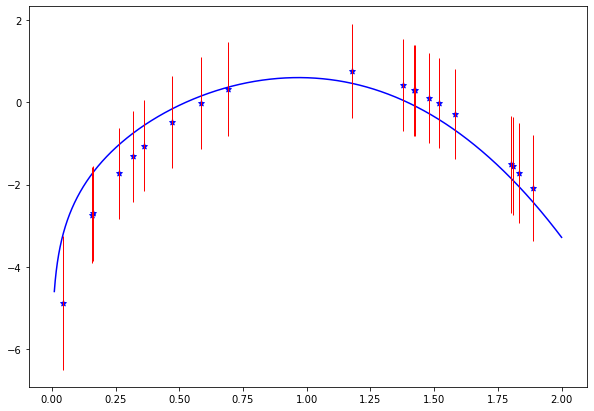

In [323]:
Bayes_least_squares(1,5,20)

After increasing theta, whether the fitting points were above or below the curve changed. However, the predicted points seem pretty similar to the curve.

Sigma eta = 5, Sigma theta=0.1, N=20

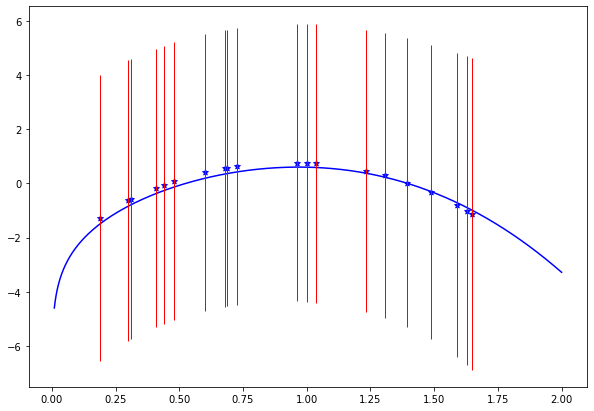

In [324]:
Bayes_least_squares(5,0.1,20)

Changing sigma eta from 1 to 5 make the predict data point fit on the model curve much worse, and increased the size of the error bars.

Sigma eta = 5, Sigma theta=5, N=20

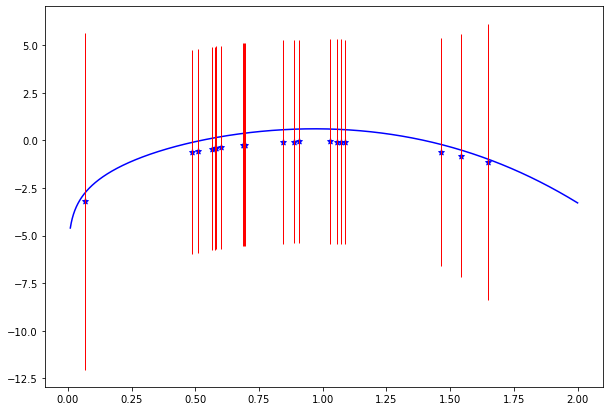

In [325]:
Bayes_least_squares(5,5,20)

Sigma eta = 1, Sigma theta=0.1, N=200

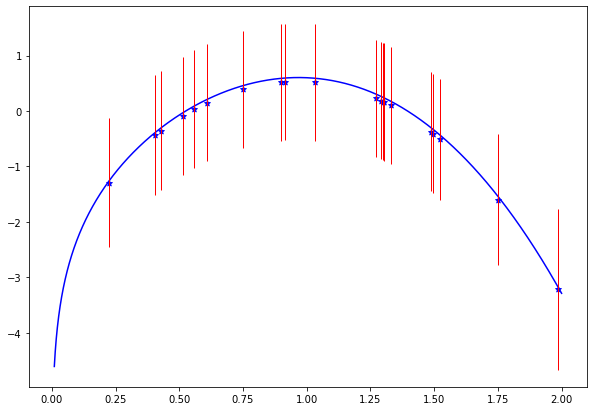

In [326]:
Bayes_least_squares(1,0.1,200)

Sigma eta = 1, Sigma theta=5, N=200

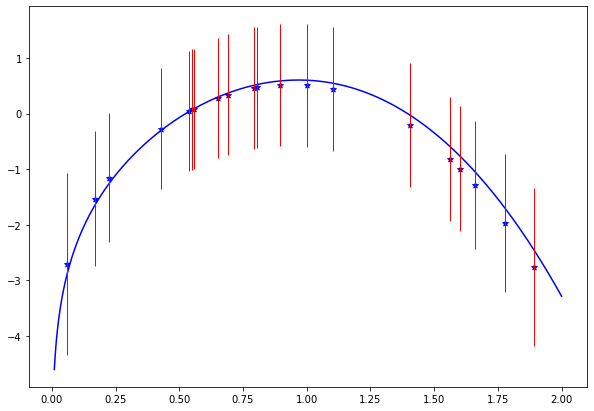

In [327]:
Bayes_least_squares(1,5,200)

Sigma eta = 5, sigma theta = 0.1, N=200

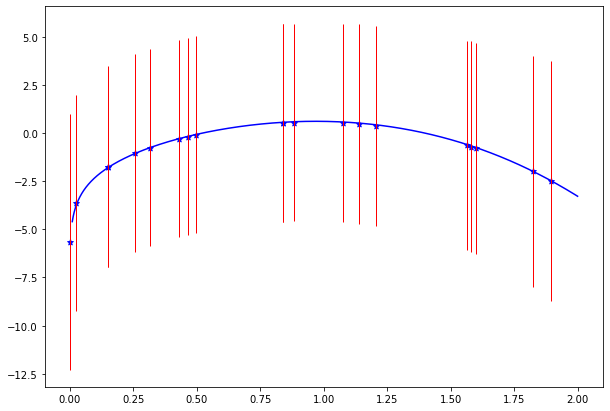

In [328]:
Bayes_least_squares(5,0.1,200)

Overall, it looks like when sigma eta increases, there is larger noise variance in the data and the error bars increase

Sigma eta = 5, Sigma theta=5, N=200

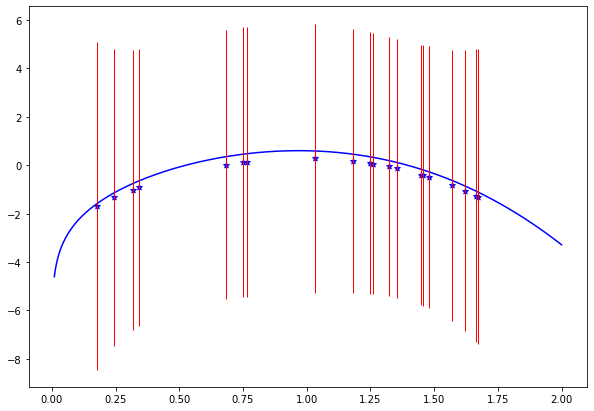

In [329]:
Bayes_least_squares(5,5,200)

Sigma eta = 1, Sigma theta=0.1, N=500

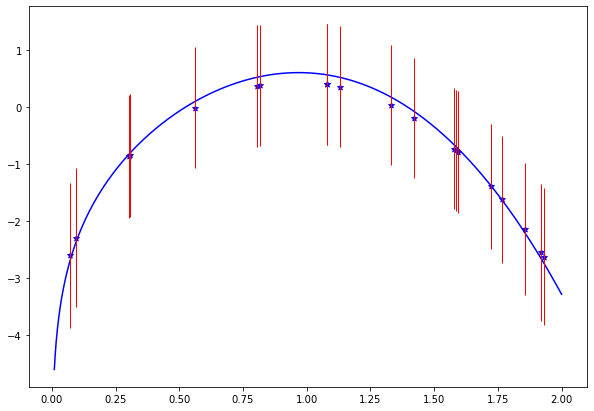

In [330]:
Bayes_least_squares(1,0.1,500)

Sigma eta = 1, Sigma theta=5, N=500

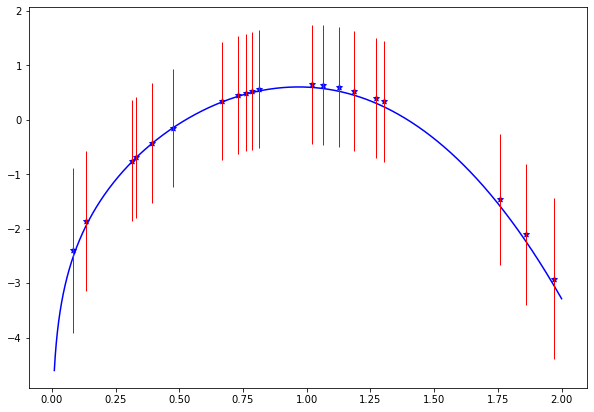

In [331]:
Bayes_least_squares(1,5,500)

Sigma eta = 5, Sigma theta=0.1, N=500

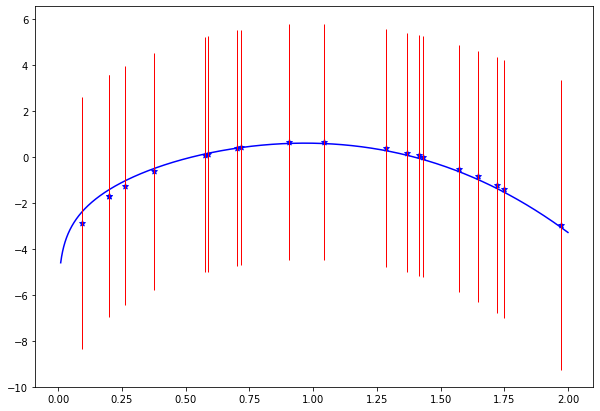

In [332]:
Bayes_least_squares(5,0.1,500)

Sigma eta = 5, Sigma theta=5, N=500

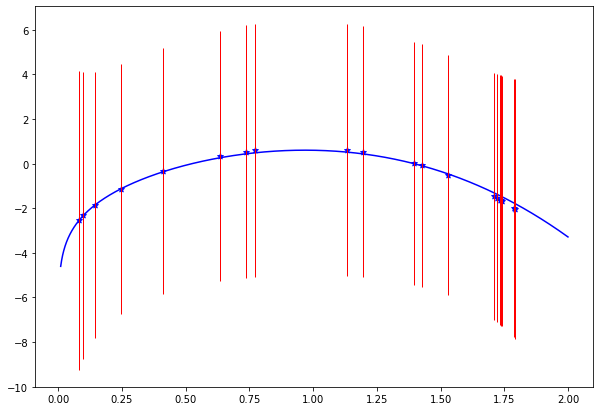

In [333]:
Bayes_least_squares(5,5,500)

Overall, it looks like larger datasets (value of N) improve model prediction, and larger noise variance increases the size of the error bars for the model. Sigma eta seems to be the driving force of how confidence intervals change, with sigma theta contributing less to this.